In [44]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [45]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisation des inputs
train_images, test_images = train_images / 255.0, test_images / 255.0

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

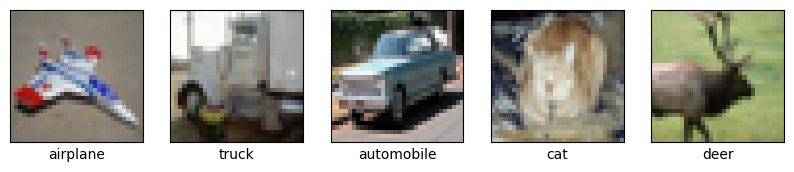

In [46]:
#Visualisation des données
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[30+i])
    plt.xlabel(class_names[train_labels[30+i][0]])
plt.show()

In [50]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))



Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.9369 - accuracy: 0.6718 - val_loss: 0.9238 - val_accuracy: 0.6735
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8498 - accuracy: 0.7020 - val_loss: 0.8939 - val_accuracy: 0.6847
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7819 - accuracy: 0.7258 - val_loss: 0.9141 - val_accuracy: 0.6877
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7285 - accuracy: 0.7434 - val_loss: 0.8800 - val_accuracy: 0.6965
Epoch 5/10
1563/1563 [==============================] - 88s 57ms/step - loss: 0.6838 - accuracy: 0.7581 - val_loss: 0.8587 - val_accuracy: 0.7099
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.6384 - accuracy: 0.7755 - val_loss: 0.8537 - val_accuracy: 0.7140
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.5992 - accuracy: 0.7883 - val_loss: 0.8431 -

In [ ]:
a

In [53]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

313/313 - 4s - loss: 0.9409 - accuracy: 0.7138 - 4s/epoch - 11ms/step


Exception ignored in: <function _xla_gc_callback at 0x7dc98133f0a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Text(0.5, 1.0, 'Train - Accuracy')

In [ ]:
## utilisation de l'augmentation de données

history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, epochs=10,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')